<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/faceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!git clone -l -s https://github.com/opencv/opencv.git 
!pwd

Cloning into 'opencv'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 275644 (delta 2), reused 5 (delta 1), pack-reused 275626
Receiving objects: 100% (275644/275644), 469.62 MiB | 23.22 MiB/s, done.
Resolving deltas: 100% (192575/192575), done.
Checking out files: 100% (6422/6422), done.
/content/cloned-repo


In [26]:
# Clone the entire repo.
!git clone -l -s https://github.com/cagBRT/computer-vision.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 95 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (95/95), done.
/content/cloned-repo/cloned-repo/cloned-repo
drawing.ipynb	     opencv1.ipynb  opencv6.ipynb   opencvKMeans.ipynb
faceDetection.ipynb  opencv2.ipynb  opencv7.ipynb   PassportScan.ipynb
images		     opencv3.ipynb  opencv8.ipynb   README.md
opencv10a.ipynb      opencv4.ipynb  opencv9a.ipynb
opencv10.ipynb	     opencv5.ipynb  opencv9.ipynb


In [27]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

create class to detect faces

use the built-in Haar cascade classifiers in OpenCV. these classifiers have already been pre-trained to recognize faces!

these classifiers work by scanning an image from left to right, and top to bottom, at varying scale sizes. Scan- ning an image from left to right and top to bottom is called the “sliding window” approach.
As the window moves from left to right and top to bot- tom, one pixel at a time, the classifier is asked whether or not it “thinks” there is a face in the current window, based on the parameters supplied to the classifier.


• scaleFactor: How much the image size is reduced at each image scale. This value is used to create the scale pyramid in order to detect faces at multiple scales in the image (some faces may be closer to the fore- ground, and thus be larger; other faces may be smaller and in the background, thus the usage of varying scales). A value of 1.05 indicates that Jeremy is re- ducing the size of the image by 5% at each level in the pyramid.<br>
• minNeighbors: How many neighbors each window should have for the area in the window to be consid- ered a face. The cascade classifier will detect multiple windows around a face. This parameter controls how many rectangles (neighbors) need to be detected for the window to be labeled a face.<br>
• minSize: A tuple of width and height (in pixels) in- dicating the minimum size of the window. Bounding boxes smaller than this size are ignored. It is a good idea to start with (30, 30) and fine-tune from there.


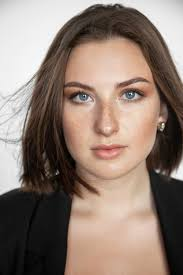

In [38]:
image = cv2.imread("images/face.jpeg")
cv2_imshow(image)

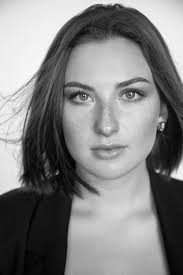

In [39]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [44]:
# initialize front face classifier
cascade = cv2.CascadeClassifier(
  "/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml")

frame = cv2.imread('face.jpeg')

# Convert to black-and-white
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blackwhite = cv2.equalizeHist(gray)

rects = cascade.detectMultiScale(blackwhite, 
                                 scaleFactor=1.3, 
                                 minNeighbors=4, 
                                 minSize=(30, 30),
                                 flags=cv2.CASCADE_SCALE_IMAGE)

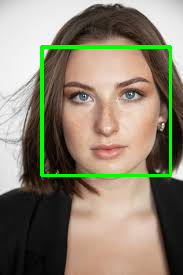

In [45]:
for (x, y, w, h) in rects:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(image)